In [1]:
import os 
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import pickle

In [2]:
#Load the pickle files
import pickle 
with open('day9results_april27.pkl', 'rb') as f:
    day9results = pickle.load(f)

# Save day7results to a pickle file
with open('day7results_april27.pkl', 'rb') as f:
    day7results = pickle.load(f)

In [3]:
certain_thresh = 0.99
certainnot_thresh = 0.01

Text(0.5, 0.98, 'Day 7')

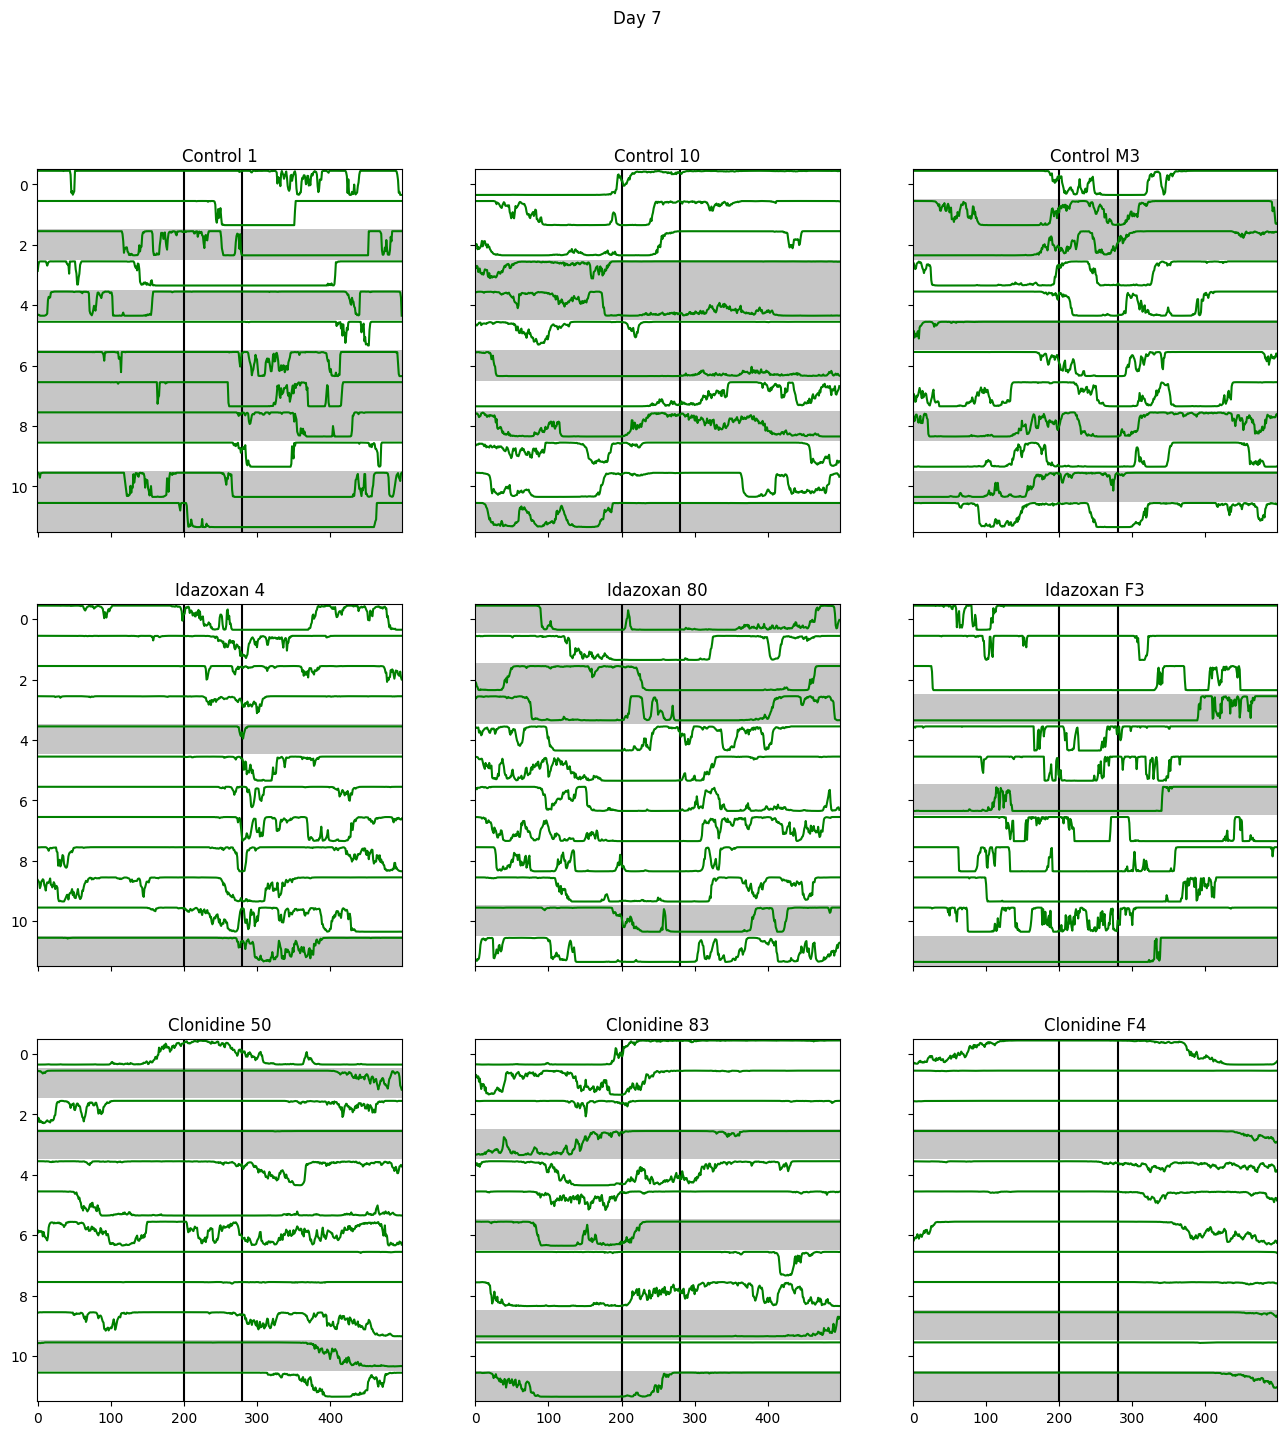

In [4]:
import numpy as np
fig, axes = plt.subplots(3, 3, figsize = (16,16), sharex = True, sharey = True)
certain_counts_d7 = {}

day = 'Day 7'
res = day7results
for idx, k in enumerate(res[list(res.keys())[0]][1].keys()):
    y_test, y_preds_test, y_preds_test_proba = res[list(res.keys())[0]][1][k]
    y_test = y_test.reshape((12,-1))
    y_preds_test = y_preds_test.reshape((12,-1))
    y_preds_test_proba = y_preds_test_proba[:,0].reshape((12,-1))

    i,j = divmod(idx, 3)

    axes[i,j].imshow(y_test, aspect = 'auto', interpolation = 'none', cmap = 'Greys', vmin = 0, vmax = 3)
    axes[i,j].axvline(x = 200, color = 'black')
    axes[i,j].axvline(x = 280, color = 'black')
    xx = range(len(y_preds_test_proba[0]))
    for t in range(12):
        axes[i,j].plot(xx, 0.8*y_preds_test_proba[t]+t-0.45, color = 'green')
    y_preds_test_proba_certain = (y_preds_test_proba > certain_thresh).astype(int)
    y_preds_test_proba_certainnot = (y_preds_test_proba < certainnot_thresh).astype(int)
    certain_counts_d7[k] = np.sum(np.diff(y_preds_test_proba_certain, axis = 1) == 1, axis = 1) + \
                           np.sum(np.diff(y_preds_test_proba_certainnot, axis = 1) == 1, axis = 1)
    title = f"{k[0]} {k[1]}"
    axes[i,j].set_title(title)
fig.suptitle(day)


Text(0.5, 0.98, 'Day 9')

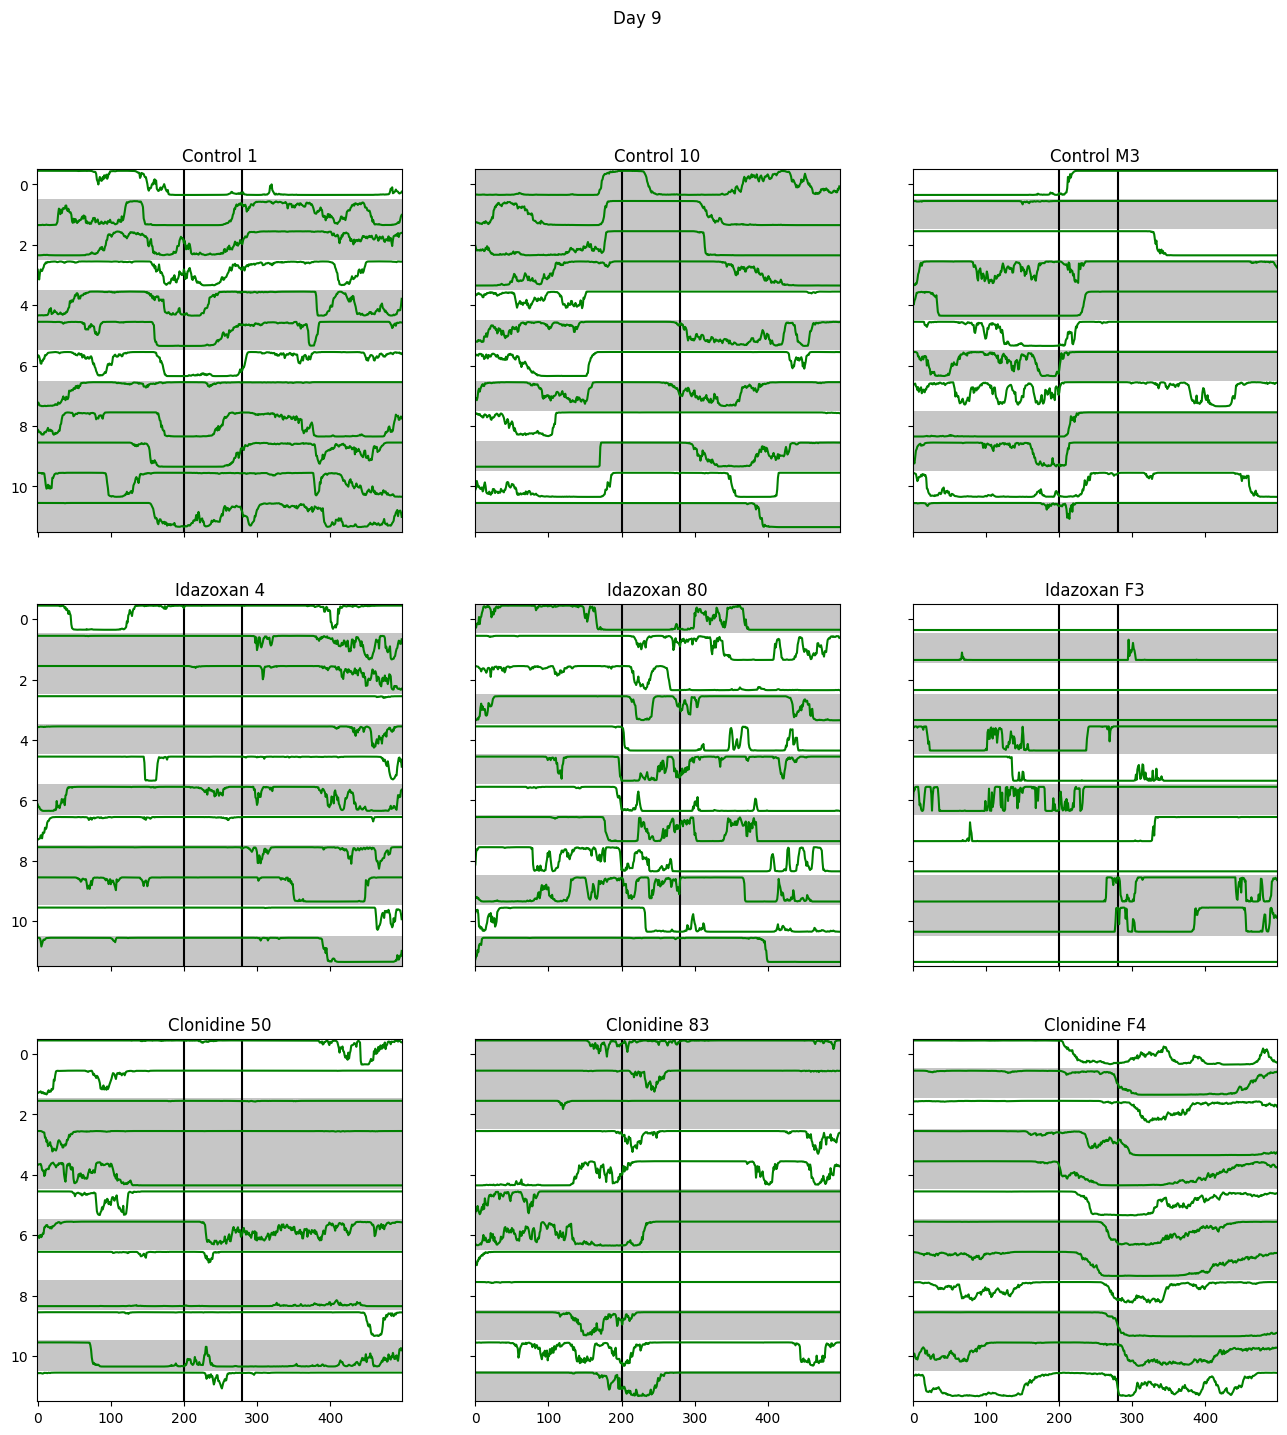

In [5]:
import numpy as np
fig, axes = plt.subplots(3, 3, figsize = (16,16), sharex = True, sharey = True)
certain_counts_d9 = {}
day = 'Day 9'
res = day9results
for idx, k in enumerate(res[list(res.keys())[0]][1].keys()):
    y_test, y_preds_test, y_preds_test_proba = res[list(res.keys())[0]][1][k]
    y_test = y_test.reshape((12,-1))
    y_preds_test = y_preds_test.reshape((12,-1))
    y_preds_test_proba = y_preds_test_proba[:,0].reshape((12,-1))

    i,j = divmod(idx, 3)

    axes[i,j].imshow(y_test, aspect = 'auto', interpolation = 'none', cmap = 'Greys', vmin = 0, vmax = 3)
    axes[i,j].axvline(x = 200, color = 'black')
    axes[i,j].axvline(x = 280, color = 'black')
    xx = range(len(y_preds_test_proba[0]))
    for t in range(12):
        axes[i,j].plot(xx, 0.8*y_preds_test_proba[t]+t-0.45, color = 'green')
    y_preds_test_proba_certain = (y_preds_test_proba > 0.99).astype(int)
    y_preds_test_proba_certainnot = (y_preds_test_proba < 0.01).astype(int)
    certain_counts_d9[k] = np.sum(np.diff(y_preds_test_proba_certain, axis = 1) == 1, axis = 1) + \
                           np.sum(np.diff(y_preds_test_proba_certainnot, axis = 1) == 1, axis = 1)
    title = f"{k[0]} {k[1]}"
    axes[i,j].set_title(title)
fig.suptitle(day)


## Count number of switches between certain predictions

In [18]:
from collections import defaultdict

In [26]:
switches_by_groups = defaultdict(list)
for k in certain_counts_d7:
    switches_by_groups[k[0]] += list(certain_counts_d7[k])
from scipy.stats import ranksums
print("Control v idazoxan", ranksums(switches_by_groups['Control'], switches_by_groups['Idazoxan']))
print("Control v clonidine", ranksums(switches_by_groups['Control'], switches_by_groups['Clonidine']))
print("Clonidine v idazoxan", ranksums(switches_by_groups['Clonidine'], switches_by_groups['Idazoxan']))

Control v idazoxan RanksumsResult(statistic=-2.004687555918475, pvalue=0.044996459696873804)
Control v clonidine RanksumsResult(statistic=2.179253045338342, pvalue=0.029312875278531787)
Clonidine v idazoxan RanksumsResult(statistic=-3.710924436377177, pvalue=0.00020650374440706645)


In [27]:
for group in switches_by_groups:
    print(group, np.median(switches_by_groups[group]))

Control 9.0
Idazoxan 13.0
Clonidine 6.5


In [24]:
switches_by_groups = defaultdict(list)
for k in certain_counts_d9:
    switches_by_groups[k[0]] += list(certain_counts_d9[k])

print("Control v idazoxan", ranksums(switches_by_groups['Control'], switches_by_groups['Idazoxan']))
print("Control v clonidine", ranksums(switches_by_groups['Control'], switches_by_groups['Clonidine']))
print("Clonidine v idazoxan", ranksums(switches_by_groups['Clonidine'], switches_by_groups['Idazoxan']))

Control v idazoxan RanksumsResult(statistic=-0.6701062335794903, pvalue=0.502790071426495)
Control v clonidine RanksumsResult(statistic=1.4415730739189034, pvalue=0.14942284898177147)
Clonidine v idazoxan RanksumsResult(statistic=-2.0722612937584235, pvalue=0.03824108000678763)


In [25]:
for group in switches_by_groups:
    print(group, np.median(switches_by_groups[group]))

Control 8.0
Idazoxan 9.5
Clonidine 6.5
